In [27]:
%load_ext autoreload
%autoreload 2
import pickle, json
from enterprise_extensions.models import model_2a
from enterprise.signals.parameter import sample as sample_params
import numpy as np
from impulse.base import PTSampler
from impulse.pta_utils import initial_sample
import matplotlib.pyplot as plt
from emcee.autocorr import integrated_time

from PTMCMCSampler.PTMCMCSampler import PTSampler as ptmcmc


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [28]:
with open('/Users/aaron/Documents/GitHub/12p5yr_stochastic_analysis/tutorials/data/psrs.pkl', 'rb') as f:
    psrs = pickle.load(f)

with open('/Users/aaron/Documents/GitHub/12p5yr_stochastic_analysis/tutorials/data/channelized_12p5yr_v3_full_noisedict.json', 'r') as f:
    params = json.load(f)

In [29]:
pta = model_2a([psrs[0]], noisedict=params, gamma_common=4.33, n_gwbfreqs=5, tm_marg=True, tnequad=True, tm_svd=True)

In [30]:
ntemps = 4
nchains = None
ndim, x0 = initial_sample(pta, ntemps, nchains)

In [38]:
sampler = PTSampler(pta.get_lnlikelihood, pta.get_lnprior, x0, tinf=True, num_samples=1_000_000, ntemps=ntemps, ncores=1, ret_chain=True)

In [39]:
chain = sampler.sample()

  5%|▌         | 53/1000 [00:35<10:01,  1.58it/s]/Users/aaron/Documents/GitHub/impulse_mcmc/impulse/proposals.py:251: RuntimeWarning: invalid value encountered in double_scalars
  q[groups[jumpind][ii]] += scale * sigma
100%|██████████| 1000/1000 [10:50<00:00,  1.54it/s]


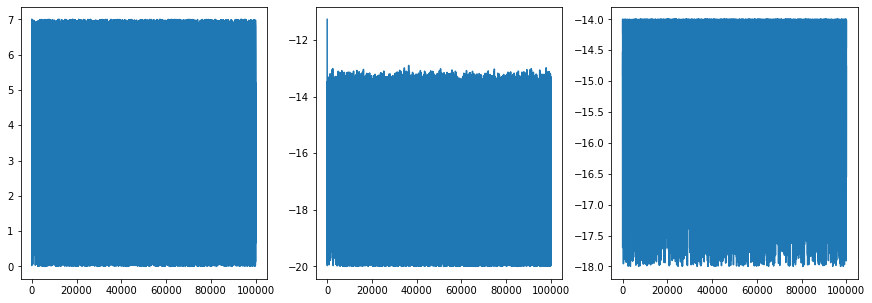

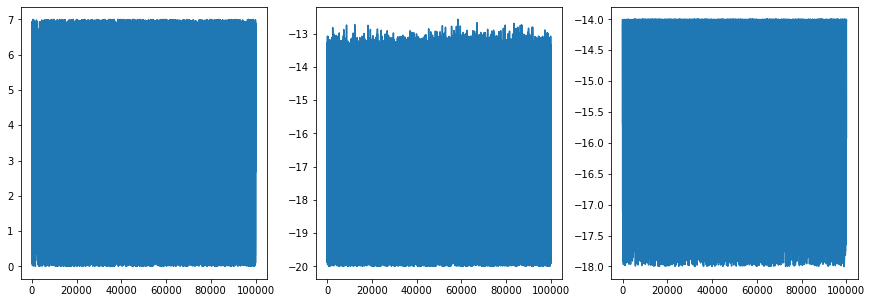

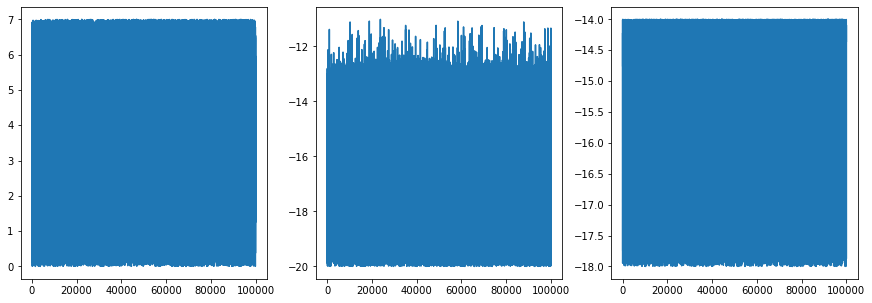

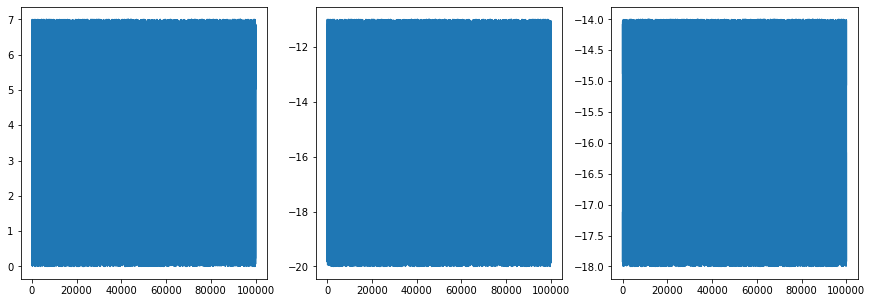

In [44]:
for ii in range(ntemps):
    fig, ax = plt.subplots(1, 3, figsize=(15, 5))
    ax[0].plot(chain[::10, 0, ii])
    ax[1].plot(chain[::10, 1, ii])
    ax[2].plot(chain[::10, 2, ii])
    plt.show()

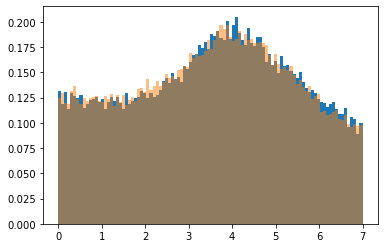

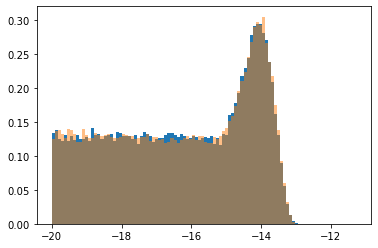

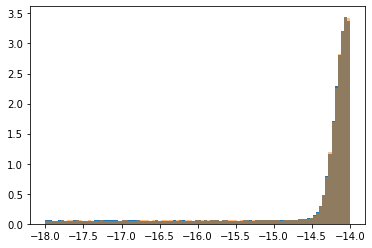

In [51]:
outDir = './chains/sngl/'
with open(outDir + 'chain_1.txt', 'r') as f:
    chain2 = np.loadtxt(f)
for ii in range(3):
    __, bins, __ = plt.hist(chain[::10, ii, 0], bins=100, density=True)
    plt.hist(chain2[:, ii], bins=bins, density=True, alpha=0.5)
    # plt.hist(samples[:, ii], bins=bins, density=True, alpha=0.5)
    plt.show()

In [22]:
x0 = np.hstack([p.sample() for p in pta.params])
ndim = len(x0)
cov = np.diag(np.ones(ndim) * 0.01**2)

outDir = './chains/sngl/'

sampler = ptmcmc(ndim, pta.get_lnlikelihood, pta.get_lnprior, cov,
                 outDir=outDir, resume=False)

In [23]:
N = int(1e6)
x0 = np.hstack([p.sample() for p in pta.params])
sampler.sample(x0, N, SCAMweight=30, AMweight=15, DEweight=50)

Finished 0.10 percent in 0.269734 s Acceptance rate = 0.95

/Users/aaron/Documents/GitHub/enterprise/enterprise/signals/parameter.py:62: RuntimeWarning: divide by zero encountered in log
  logpdf = np.log(self.prior(value, **kwargs))


Finished 1.00 percent in 2.160348 s Acceptance rate = 0.327489Adding DE jump with weight 50
Finished 99.90 percent in 187.686014 s Acceptance rate = 0.216825
Run Complete


In [52]:
outDir = './chains/sngl/'
with open(outDir + 'chain_1.txt', 'r') as f:
    chain2 = np.loadtxt(f)

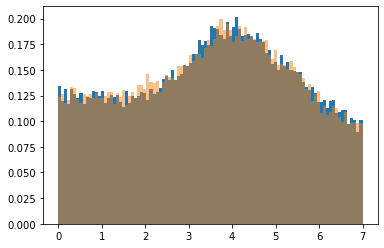

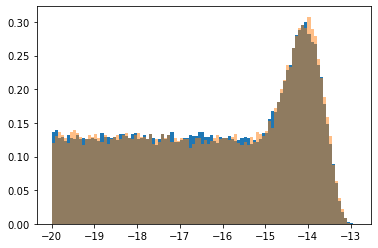

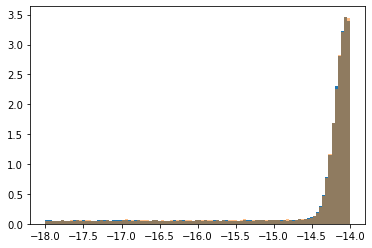

In [54]:
for ii in range(3):
    __, bins, __ = plt.hist(chain[20_000:, ii, 0], bins=100, density=True)
    plt.hist(chain2[20_000:, ii], bins=bins, density=True, alpha=0.5)
    # plt.hist(samples[:, ii], bins=bins, density=True, alpha=0.5)
    plt.show()

In [56]:
ii = 2
print(integrated_time(chain[20000:, ii, 0]) / 10)
print(integrated_time(chain2[20_000:, ii]))

[11.47031131]
[20.046841]


In [62]:
ii = 2
print(integrated_time(chain2[:, ii]))
print(integrated_time(chain[:, ii, 0], quiet=True) / 10)
# print(integrated_time(samples[:, ii], quiet=True))

[19.02034294]
[11.79808274]
